# Лабораторна Робота №1

Гапоненко Антон ФІ-41

<b>Тема</b>: Наука про дані: підготовчий етап <br><br>
<b>Мета роботи</b>: ознайомитися з основними кроками по роботі з даними – workflow від постановки задачі до написання пояснювальної записки, зрозуміти постановку задачі та природу даних, над якими виконується аналітичні операції

In [17]:
# -*- coding: utf-8 -*-
import urllib2
import pandas as pd
import numpy as np
import csv
import time
import pprint
#Бібліотека для роботи з графіками
import matplotlib.pyplot as plt
%matplotlib inline

#Функція, яка повертає справжній id країни з сайту 
def get_id(id):
    S=[24,25,5,6,27,23,26,7,11,13,14,15,16,17,18,19,21,22,8,9,10,1,3,2,4]
    return S[id-1]    

#Функція, яка повертає ім'я регіону
def get_name(id):  
    return {
        1: "Vinnitsa",
        2: "Volyn",
        3: "Dnipropetrovsk",
        4: "Donetsk",
        5: "Zhytomyr",
        6: "Zakarpattya",
        7: "Zaporizhzhya",
        8: "Ivano-Frankivsk",
        9: "Kyiv",
       10: "Kirovograd",
       11: "Lugansk",
       12: "Lviv",
       13: "Nicholas",
       14: "Odessa",
       15: "Poltava",
       16: "Rivne",
       17: "Sums",
       18: "Ternopil",
       19: "Kharkiv",
       20: "Kherson",
       21: "Khmelnytsky",
       22: "Cherkasy",
       23: "Chernivtsi",
       24: "Chernihiv",
       25: "Republic of Crimea",
    }.get(id, "nothing")

In [18]:
#Функція, якак повертає ім'я файлу, що завантажується
def filename(a,state):
    strtime = time.strftime("%Y-%m-%d_%Hh%Mm%Ss")
    id = str(a)
    file_name = r'id_'+id+'_'+state+'_'+strtime+'.csv' 
    return file_name

#Функція збереження файлу до домашнього каталогу
def save(a, file):
    if (a<10):
        url=r"http://www.star.nesdis.noaa.gov/smcd/emb/vci/gvix/G04/ts_L1/ByProvince/Mean/L1_Mean_UKR.R0%s.txt" % a
    elif (a>=10):
        url=r"http://www.star.nesdis.noaa.gov/smcd/emb/vci/gvix/G04/ts_L1/ByProvince/Mean/L1_Mean_UKR.R%s.txt" % a
    else: 
        print("Error!")
    vhi_url = urllib2.urlopen(url)    
    out = open("/home/anton/datascience/lab_1/data/%s" % file,'wb') 
    out.write(vhi_url.read())    
    out.close()    
    print "VHI is downloaded..."

In [19]:
#Функція, яка завантажує csv-файл до фрейму та видаляє -1 і непотрібні символи
#Сирі дані містятья у каталозі rawdata, а відформатовані у каталог freshdata
def readtoframe(file):
    name_columns = ['Year','Week','SMN','SMT','VCI','TCI','VHI','Area-VHI-LESS-15','Area-VHI-LESS-35']   
    df = pd.read_csv(r"/home/anton/datascience/lab_1/data/%s" % file, index_col=False, header=1) 
    df = df[df.VHI != -1.0]      
    df.columns = name_columns  
    new_file = 'new_' + file
    df.to_csv(r"/home/anton/datascience/lab_1/newdata/%s" % new_file)
    
    

In [20]:
#Функція, яка виводить мінімальний VHI та рік в якому він був, для певного регіону за всі роки
def VHI_min(file,state):
    df = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file) 
    print('\nMIN_VHI_'+state+': '+str(df['VHI'].min()))
    df = df[df['VHI']==df['VHI'].min()]
    print(int(df.iloc[0,1]))
      
#Функція, яка виводить максимальний VHI та рік в якому він був, для певного регіону за всі роки
def VHI_max(file,state):
    df = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file) 
    print('\nMAX_VHI_'+state+': '+str(df['VHI'].max()))
    df = df[df['VHI']==df['VHI'].max()]
    print(int(df.iloc[0,1]))   

#Функція, яка виводить рік та тиждень в яких VHI<15   
def VHI_drought(file,state):
    df = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file) 
    df=df[(df['Year']!=0) & (df['VHI']<15)]
    print('\nDrought in '+state+' was:')
    print df.loc[:,['Year','Week','VHI']] 
    
#Функція, яка виводить рік та тиждень в яких VHI<15 та VHI>75     
def anomaly_VHI(file,state):
    
    df = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file) 
    print('\nAnomaly VHI less than 15 '+state+':')
    df = df[df['VHI']<=15.0]
    if (df.empty):
        print ('None')
    else:
        print df.loc[:,['Year','Week','VHI']] 
    
    
    df = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file) 
    print('\nAnomaly VHI more than 75 '+state+':')
    df = df[df['VHI']>=75.0]
    if (df.empty):
        print ('None')
    else:
        print df.loc[:,['Year','Week','VHI']]  

In [21]:
#Функція, яка будує графіки за певний рік
#Графіки будуються для певної області за рік, які показують залежність аномальні VHI від тижня року. 
def Plot_build(file,state,year):  
    title = 'Anomaly VHI '+state+' '+str(year)
         
    plt.figure(figsize=(10,5))
    plt.title(title,fontsize=20)
    
    df = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file)    
    df=df[(df['Year']==year)]
    df=df.loc[:,['Year','Week','VHI']]  
    plt.plot(df['Week'], df['VHI'], label='VHI', color = 'grey')
    
    df1 = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file)    
    df1=df1[(df1['Year']==year) & (df1['VHI']<=15.0)]
    df1=df1.loc[:,['Year','Week','VHI']]  
    plt.scatter(df1['Week'], df1['VHI'], label='min', color = 'red', marker = 'x', s=100)
    
    df2 = pd.read_csv(r"/home/anton/datascience/lab_1/newdata/%s" % file) 
    df2=df2[(df2['Year']==year) & (df2['VHI']>=75.0)]
    df2=df2.loc[:,['Year','Week','VHI']] 
    plt.scatter(df2['Week'], df2['VHI'], label='max', color = 'blue', marker = '*', s=100)

    plt.xlabel('Week')
    plt.ylabel('VHI')
    plt.ylim(0,100)
    plt.xlim(1,52)
    plt.legend()
    plt.grid()  

VHI is downloaded...
File: id_5_Dnipropetrovsk_2016-04-01_19h34m30s.csv


Anomaly VHI less than 15 Dnipropetrovsk:
     Year  Week    VHI
251  1986    35  14.24
252  1986    36  13.30

[2 rows x 3 columns]

Anomaly VHI more than 75 Dnipropetrovsk:
      Year  Week    VHI
633   1994     2  75.93
634   1994     3  76.39
635   1994     4  78.78
636   1994     5  81.64
637   1994     6  81.80
638   1994     7  77.31
795   1997    30  78.35
796   1997    31  79.59
797   1997    32  80.62
798   1997    33  81.44
799   1997    34  81.55
800   1997    35  80.80
801   1997    36  78.76
802   1997    37  76.36
1107  2003    30  78.63
1108  2003    31  79.91
1109  2003    32  79.55
1110  2003    33  77.03
1159  2004    30  75.10
1160  2004    31  75.37
1161  2004    32  76.07
1162  2004    33  76.62
1163  2004    34  76.23

[23 rows x 3 columns]

MIN_VHI_Dnipropetrovsk: 13.3
1986

MAX_VHI_Dnipropetrovsk: 81.8
1994

Drought in Dnipropetrovsk was:
     Year  Week    VHI
251  1986    35  14.24
252  

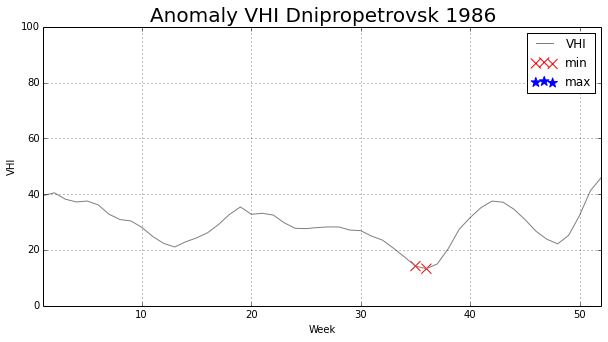

In [22]:
id = 3
year=1986
state = get_name(id)
new_id = get_id(id)
file_name = filename(new_id,state)
new_file_name = 'new_' + file_name
save(new_id,file_name)
print('File: '+file_name+'\n')
readtoframe(file_name)
anomaly_VHI(new_file_name,state)
VHI_min(new_file_name,state)
VHI_max(new_file_name,state)
VHI_drought(new_file_name,state)
Plot_build(new_file_name,state,year)

# Висновок
На цій лабораторній роботі я отримав елементарні знання в області DataScience. Дані для дослідження були взяті з сайту http://www.star.nesdis.noaa.gov. Цей сайт є центром по застосуванню супутникових систем і досліджень процесів, які відбуваються на нашій планеті. Дані, які я використовував пов'язані з індексом VHI - це вегетаційний індекс, який базується на відбитті видимого світла рослинним покривом. Вони були досліджені для різних областей України. Так звані сирі дані(raw data) були завантажені до фрейму та змінені відповідно до завдання. Було виконане додаткове завдання для виведення аномальних показників VHI.
Побудовано графіки для певної області за різні роки, які показують залежність аномального VHI індексу від тижня року. 